In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Loading Dataset


In [2]:
data = pd.read_csv('/content/Employee.csv')
data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [3]:
#Remove the unnecessary index column
data=data.drop(columns=['Employee ID'])
data.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,No,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,59,Female,4,Media,5534,Poor,High,Low,3.0,No,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,24,Female,10,Healthcare,8159,Good,High,Low,0.0,No,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,36,Female,7,Education,3989,Good,High,High,1.0,No,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,56,Male,41,Education,4821,Fair,Very High,Average,0.0,Yes,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [4]:
data.shape

(74498, 23)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       74498 non-null  int64  
 1   Gender                    74498 non-null  object 
 2   Years at Company          74498 non-null  int64  
 3   Job Role                  74498 non-null  object 
 4   Monthly Income            74498 non-null  int64  
 5   Work-Life Balance         74494 non-null  object 
 6   Job Satisfaction          74498 non-null  object 
 7   Performance Rating        74494 non-null  object 
 8   Number of Promotions      74493 non-null  float64
 9   Overtime                  74498 non-null  object 
 10  Distance from Home        74498 non-null  int64  
 11  Education Level           74493 non-null  object 
 12  Marital Status            74494 non-null  object 
 13  Number of Dependents      74492 non-null  float64
 14  Job Le

In [6]:
data.dtypes

,0
Age,int64
Gender,object
Years at Company,int64
Job Role,object
Monthly Income,int64
Work-Life Balance,object
Job Satisfaction,object
Performance Rating,object
Number of Promotions,float64
Overtime,object


In [7]:
data.nunique()

,0
Age,42
Gender,2
Years at Company,51
Job Role,5
Monthly Income,9842
Work-Life Balance,4
Job Satisfaction,4
Performance Rating,4
Number of Promotions,5
Overtime,2


In [8]:
data.describe()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,74498.000000,74498.000000,74498.000000,74493.000000,74498.000000,74492.000000,74498.000000
mean,38.529746,15.721603,7299.379514,0.832978,49.991584,1.650365,55.727456
std,12.083456,11.223744,2152.508566,0.995303,28.513611,1.553660,25.399349
min,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,39.000000,13.000000,7348.000000,1.000000,50.000000,1.000000,56.000000
75%,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


EDA

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Years at Company'}>,
        <Axes: title={'center': 'Monthly Income'}>],
       [<Axes: title={'center': 'Number of Promotions'}>,
        <Axes: title={'center': 'Distance from Home'}>,
        <Axes: title={'center': 'Number of Dependents'}>],
       [<Axes: title={'center': 'Company Tenure'}>, <Axes: >, <Axes: >]],
      dtype=object)

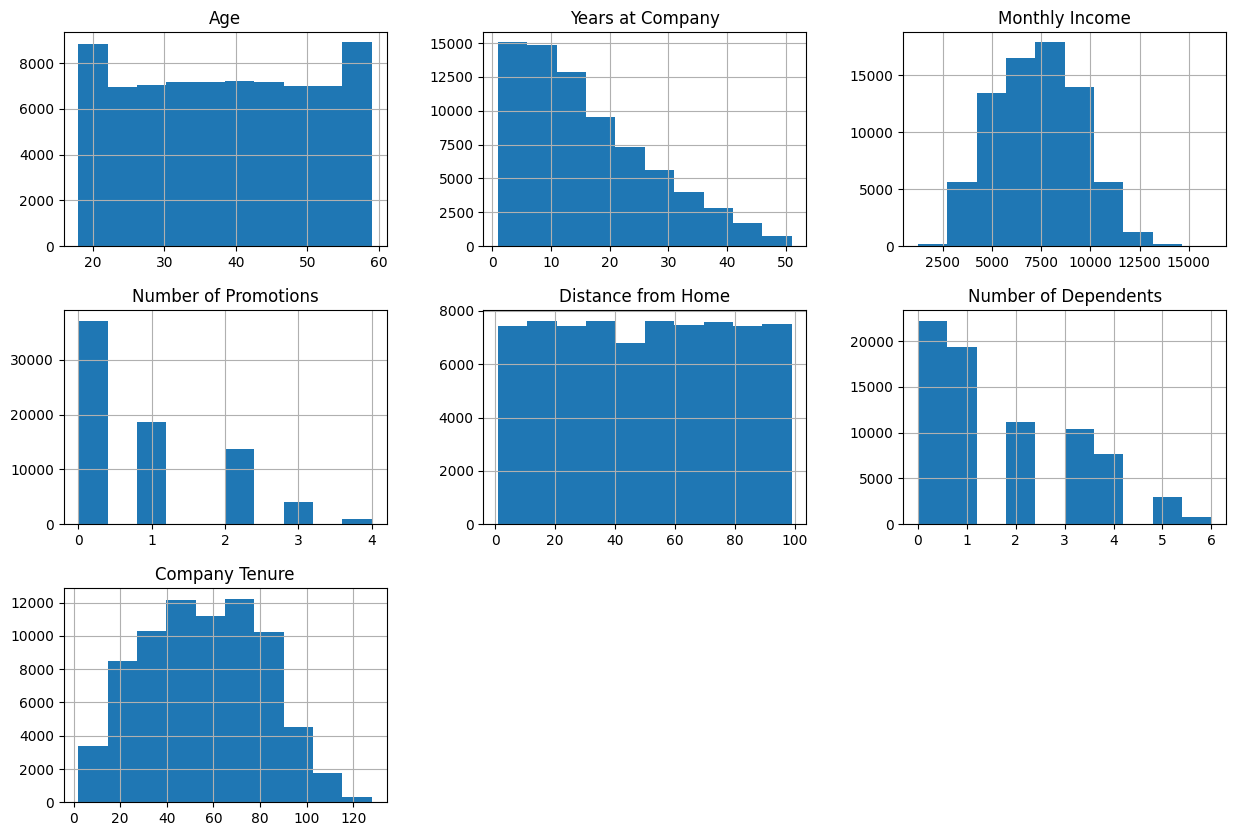

In [9]:
data.hist(figsize=(15,10))

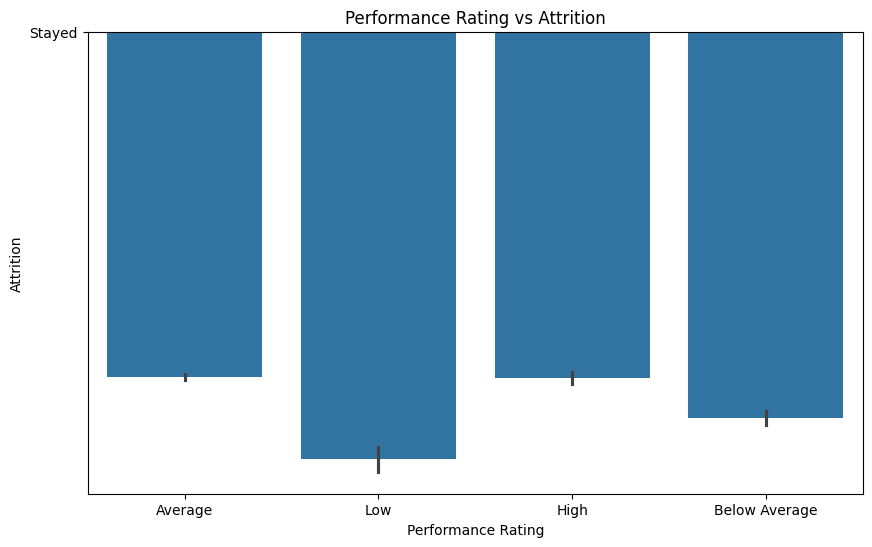

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(x=data['Performance Rating'],y=data['Attrition'])
plt.title('Performance Rating vs Attrition')
plt.xlabel('Performance Rating')
plt.ylabel('Attrition')
plt.show()

preprocessing



In [11]:
data.isnull().sum()

,0
Age,0
Gender,0
Years at Company,0
Job Role,0
Monthly Income,0
Work-Life Balance,4
Job Satisfaction,0
Performance Rating,4
Number of Promotions,5
Overtime,0


In [12]:
# Fill categorical columns with the mode
data['Work-Life Balance'].fillna(data['Work-Life Balance'].mode()[0], inplace=True)
data['Performance Rating'].fillna(data['Performance Rating'].mode()[0], inplace=True)
data['Education Level'].fillna(data['Education Level'].mode()[0], inplace=True)
data['Marital Status'].fillna(data['Marital Status'].mode()[0], inplace=True)
data['Job Level'].fillna(data['Job Level'].mode()[0], inplace=True)
data['Company Size'].fillna(data['Company Size'].mode()[0], inplace=True)
data['Remote Work'].fillna(data['Remote Work'].mode()[0], inplace=True)
data['Employee Recognition'].fillna(data['Employee Recognition'].mode()[0], inplace=True)



In [13]:
# Fill numeric columns with the mean and median values
data['Number of Promotions'].fillna(data['Number of Promotions'].mean(), inplace=True)
data['Number of Dependents'].fillna(data['Number of Dependents'].median(), inplace=True)



In [14]:
#rechek nullvalues
data.isnull().sum()

,0
Age,0
Gender,0
Years at Company,0
Job Role,0
Monthly Income,0
Work-Life Balance,0
Job Satisfaction,0
Performance Rating,0
Number of Promotions,0
Overtime,0


In [15]:
data.duplicated().sum()

0

<function matplotlib.pyplot.show(close=None, block=None)>

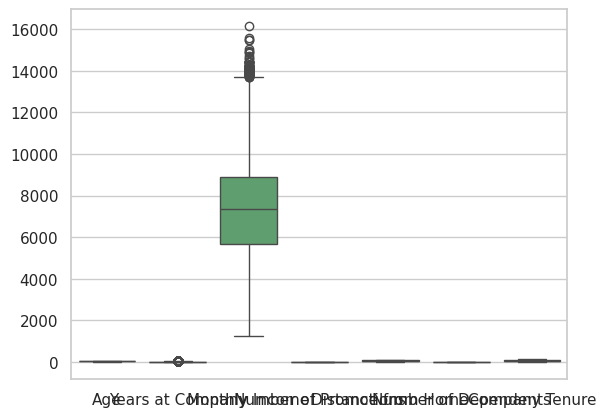

In [16]:
#checking ouliers
sns.set(style='whitegrid')
sns.boxplot(data=data)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

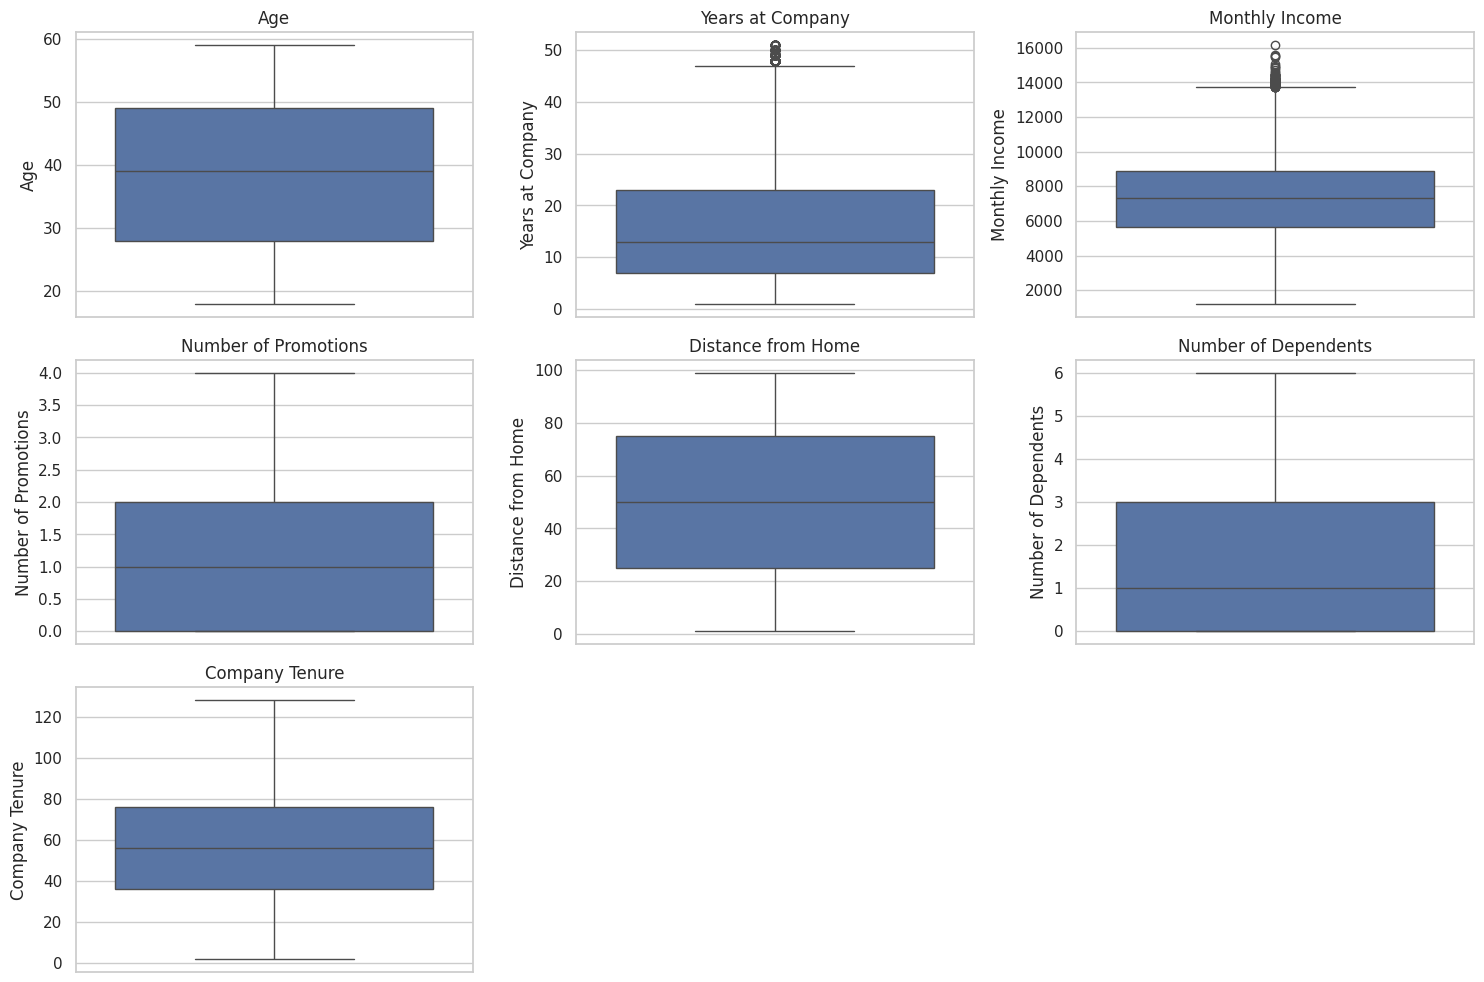

In [17]:
sns.set(style='whitegrid')
numerical_columns = ['Age',	'Years at Company',	'Monthly Income','Number of Promotions','Distance from Home','Number of Dependents','Company Tenure']
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_columns):
  plt.subplot(3,3,i+1)
  sns.boxplot(y=data[col])
  plt.title(col)
plt.tight_layout()
plt.show

In [18]:
outliers_columns =['Years at Company','Monthly Income']

In [19]:
#remove outliers
Q1 = data[outliers_columns].quantile(0.25)
Q3 = data[outliers_columns].quantile(0.75)

IQR = Q3 - Q1
IQR

,0
Years at Company,16.0
Monthly Income,3224.0


In [20]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower = (data[outliers_columns] < lower_bound)
upper = (data[outliers_columns] < upper_bound)
data[outliers_columns]=data[outliers_columns].clip(lower=lower_bound,upper=upper_bound,axis=1)

<Axes: >

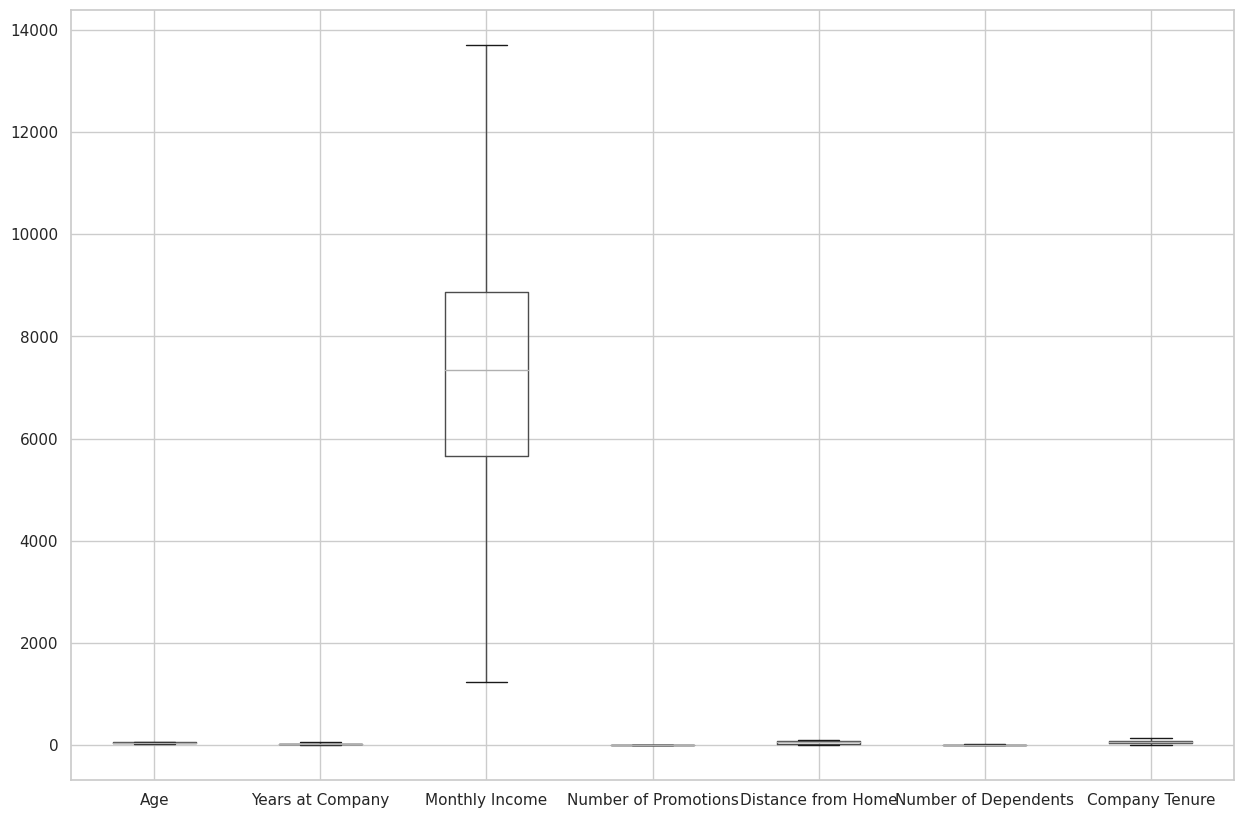

In [21]:
#recheck outliers
data.boxplot(figsize=(15,10))

In [22]:
#unique values of catogorical colums
catogorical_columns=['Gender','Job Role','Work-Life Balance','Job Satisfaction','Performance Rating','Overtime','Education Level','Marital Status',
                  'Job Level','Company Size','Remote Work','Leadership Opportunities','Innovation Opportunities',
                  'Company Reputation','Employee Recognition','Attrition']

for i in catogorical_columns:
  print(data[i].value_counts())

Gender
Male      40826
Female    33672
Name: count, dtype: int64
Job Role
Technology    19322
Healthcare    17074
Education     15658
Media         11996
Finance       10448
Name: count, dtype: int64
Work-Life Balance
Good         28161
Fair         22528
Excellent    13431
Poor         10378
Name: count, dtype: int64
Job Satisfaction
High         37245
Very High    15079
Medium       14717
Low           7457
Name: count, dtype: int64
Performance Rating
Average          44720
High             14910
Below Average    11139
Low               3729
Name: count, dtype: int64
Overtime
No     50157
Yes    24341
Name: count, dtype: int64
Education Level
Bachelor’s Degree    22336
Associate Degree     18648
Master’s Degree      15019
High School          14679
PhD                   3816
Name: count, dtype: int64
Marital Status
Married     37421
Single      25999
Divorced    11078
Name: count, dtype: int64
Job Level
Entry     29783
Mid       29676
Senior    15039
Name: count, dtype: int64
Company

In [23]:
data['Education Level'].value_counts()


,count
Education Level,
Bachelor’s Degree,22336
Associate Degree,18648
Master’s Degree,15019
High School,14679
PhD,3816


In [24]:
data['Marital Status'].value_counts()

,count
Marital Status,
Married,37421
Single,25999
Divorced,11078


In [25]:
data['Job Level'].value_counts()

,count
Job Level,
Entry,29783
Mid,29676
Senior,15039


In [26]:
data['Company Size'].value_counts()

,count
Company Size,
Medium,37232
Small,22354
Large,14912


In [27]:
data['Job Role'].value_counts()

,count
Job Role,
Technology,19322
Healthcare,17074
Education,15658
Media,11996
Finance,10448


In [28]:
# manual encoding for binary values
data['Innovation Opportunities'] = data['Innovation Opportunities'].map({'No': 0, 'Yes': 1})
data['Leadership Opportunities']=data['Leadership Opportunities'].map({'No':0,'Yes':1})
data['Remote Work']=data['Remote Work'].map({'No':0,'Yes':1})
data['Overtime']=data['Overtime'].map({'No':0,'Yes':1})
data['Attrition']=data['Attrition'].map({'Stayed':1,'Left':0})

In [29]:
# manual encoding for datas with ordinal values
data['Work-Life Balance']=data['Work-Life Balance'].map({'Poor':0,'Fair':1,'Good':2,'Excellent':2})
data['Performance Rating']=data['Performance Rating'].map({'Low':0,'Below Average':1,'Average':2,'High':3})
data['Job Satisfaction']=data['Job Satisfaction'].map({'Low':0,'Medium':1,'High':2,'Very High':3})
data['Marital Status']=data['Marital Status'].map({'Single':0,'Married':1,'Divorced':2})

data['Education Level']=data['Education Level'].map({'High School':0,'Associate Degree':1,'Bachelor’s Degree':2,'Master’s Degree':3,'PhD':4})
data['Job Level']=data['Job Level'].map({'Entry':0,'Mid':1,'Senior':2})

data['Company Size']=data['Company Size'].map({'Small':0,'Medium':1,'Large':2})

data['Employee Recognition']=data['Employee Recognition'].map({'Low':0,'Medium':1,'High':2,'Very High':3})
data['Gender']=data['Gender'].map({'Female':0,'Male':1})

data['Job Role']=data['Job Role'].map({'Education':0, 'Media':1,'Healthcare':2,'Technology':3, 'Finance':4})
data['Company Reputation']=data['Company Reputation'].map({'Excellent':3, 'Fair':1, 'Poor':0, 'Good':2})


In [30]:
data.corr()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
Age,1.000000,-0.003467,0.537264,-0.002365,-0.001758,0.003262,-0.000308,0.000329,0.000655,-0.000451,...,0.003650,-0.001291,-0.003033,0.236337,-0.000702,-0.002444,0.001334,-0.000456,0.000633,0.050801
Gender,-0.003467,1.000000,-0.001610,-0.004727,-0.000814,0.007924,0.002308,0.004503,-0.001454,-0.000013,...,0.001638,0.003342,0.005752,-0.000496,0.001942,0.002261,0.002400,-0.005060,-0.000425,0.100637
Years at Company,0.537264,-0.001610,1.000000,-0.003440,-0.005948,0.001323,-0.000274,0.001468,0.000969,-0.002262,...,0.004440,0.002562,-0.000627,0.442566,-0.000488,0.000383,0.002313,-0.000624,-0.002879,0.065419
Job Role,-0.002365,-0.004727,-0.003440,1.000000,0.756349,0.005843,-0.007708,0.003185,0.009171,0.000019,...,-0.000794,-0.003905,-0.005401,-0.007562,-0.002846,-0.003883,0.002068,-0.002752,-0.006051,0.010321
Monthly Income,-0.001758,-0.000814,-0.005948,0.756349,1.000000,0.003294,-0.006025,0.003923,0.005637,-0.004716,...,0.001489,-0.002244,0.000125,-0.006960,-0.000019,-0.005108,-0.000638,-0.002454,-0.004968,0.010726
Work-Life Balance,0.003262,0.007924,0.001323,0.005843,0.003294,1.000000,-0.003784,0.002657,-0.003896,-0.011632,...,-0.002545,0.000585,0.006823,0.001027,0.000481,-0.002716,0.003804,-0.000126,0.000474,0.182584
Job Satisfaction,-0.000308,0.002308,-0.000274,-0.007708,-0.006025,-0.003784,1.000000,0.001118,0.000651,-0.001717,...,0.006258,-0.001517,0.005497,0.002556,0.000601,0.002104,0.007808,0.005881,0.001888,-0.010899
Performance Rating,0.000329,0.004503,0.001468,0.003185,0.003923,0.002657,0.001118,1.000000,0.006365,0.005016,...,0.002005,-0.000839,0.001521,-0.001539,0.006406,0.001411,0.000838,0.000999,-0.004145,0.049428
Number of Promotions,0.000655,-0.001454,0.000969,0.009171,0.005637,-0.003896,0.000651,0.006365,1.000000,-0.002526,...,-0.001446,0.000259,-0.002382,0.005149,0.004683,-0.002552,-0.000306,0.003342,-0.001326,0.081158
Overtime,-0.000451,-0.000013,-0.002262,0.000019,-0.004716,-0.011632,-0.001717,0.005016,-0.002526,1.000000,...,0.001764,-0.003268,0.001985,0.001988,0.000731,-0.002327,-0.001535,-0.002152,0.001385,-0.056019


In [31]:
numerical_df = data.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
print(correlation_matrix)


                               Age    Gender  Years at Company  Job Role  \
Age                       1.000000 -0.003467          0.537264 -0.002365   
Gender                   -0.003467  1.000000         -0.001610 -0.004727   
Years at Company          0.537264 -0.001610          1.000000 -0.003440   
Job Role                 -0.002365 -0.004727         -0.003440  1.000000   
Monthly Income           -0.001758 -0.000814         -0.005948  0.756349   
Work-Life Balance         0.003262  0.007924          0.001323  0.005843   
Job Satisfaction         -0.000308  0.002308         -0.000274 -0.007708   
Performance Rating        0.000329  0.004503          0.001468  0.003185   
Number of Promotions      0.000655 -0.001454          0.000969  0.009171   
Overtime                 -0.000451 -0.000013         -0.002262  0.000019   
Distance from Home       -0.004586 -0.002077         -0.004799  0.000603   
Education Level           0.003595 -0.003909          0.005305 -0.003564   
Marital Stat

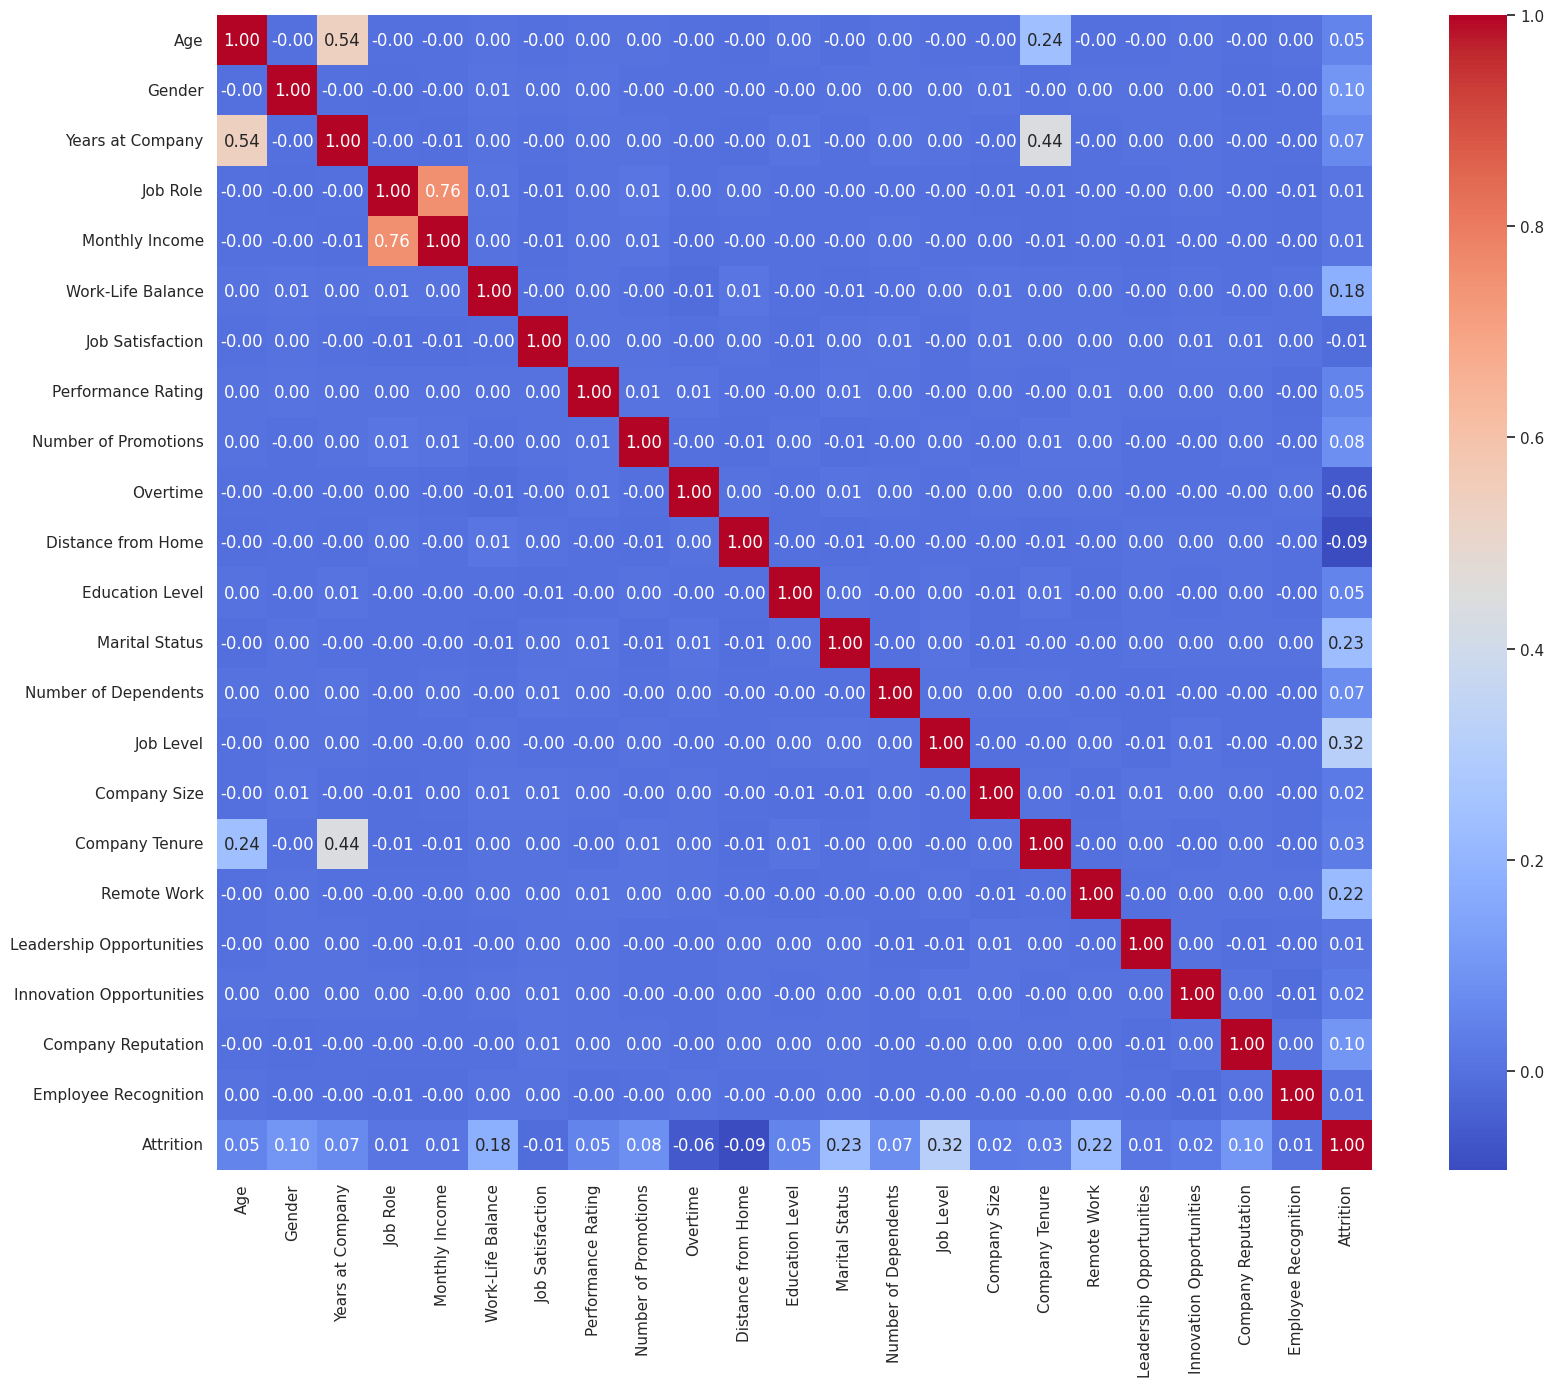

In [32]:
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix,annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.show()

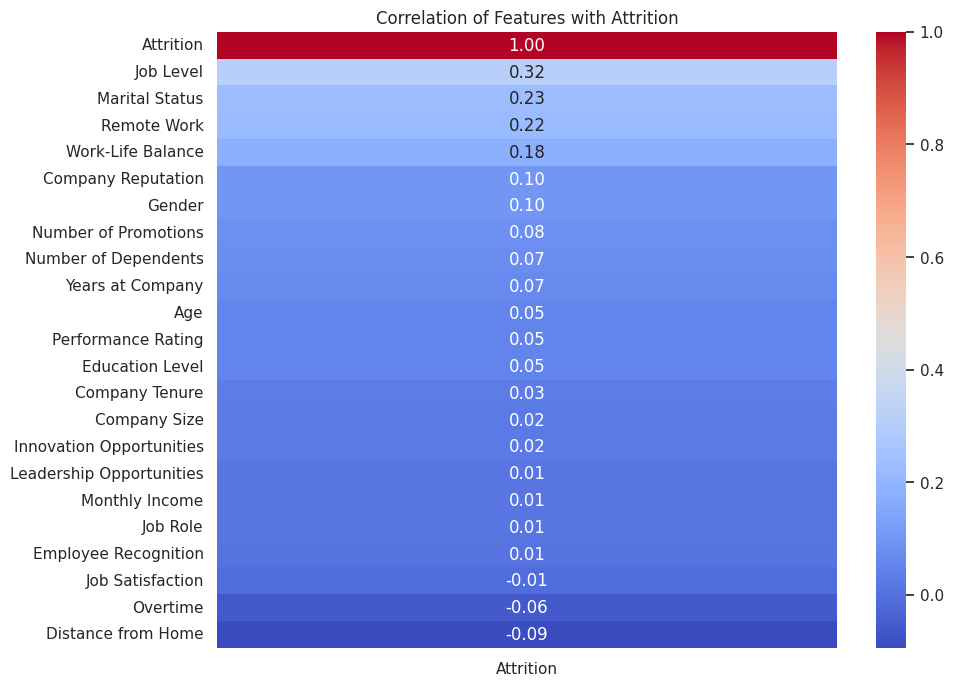

In [33]:
plt.figure(figsize=(10, 8))
correlation_with_target = correlation_matrix['Attrition'].sort_values(ascending=False)
sns.heatmap(correlation_with_target.to_frame(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation of Features with Attrition')
plt.show()

<ipython-input-34-4b79a028a1e9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='coolwarm')


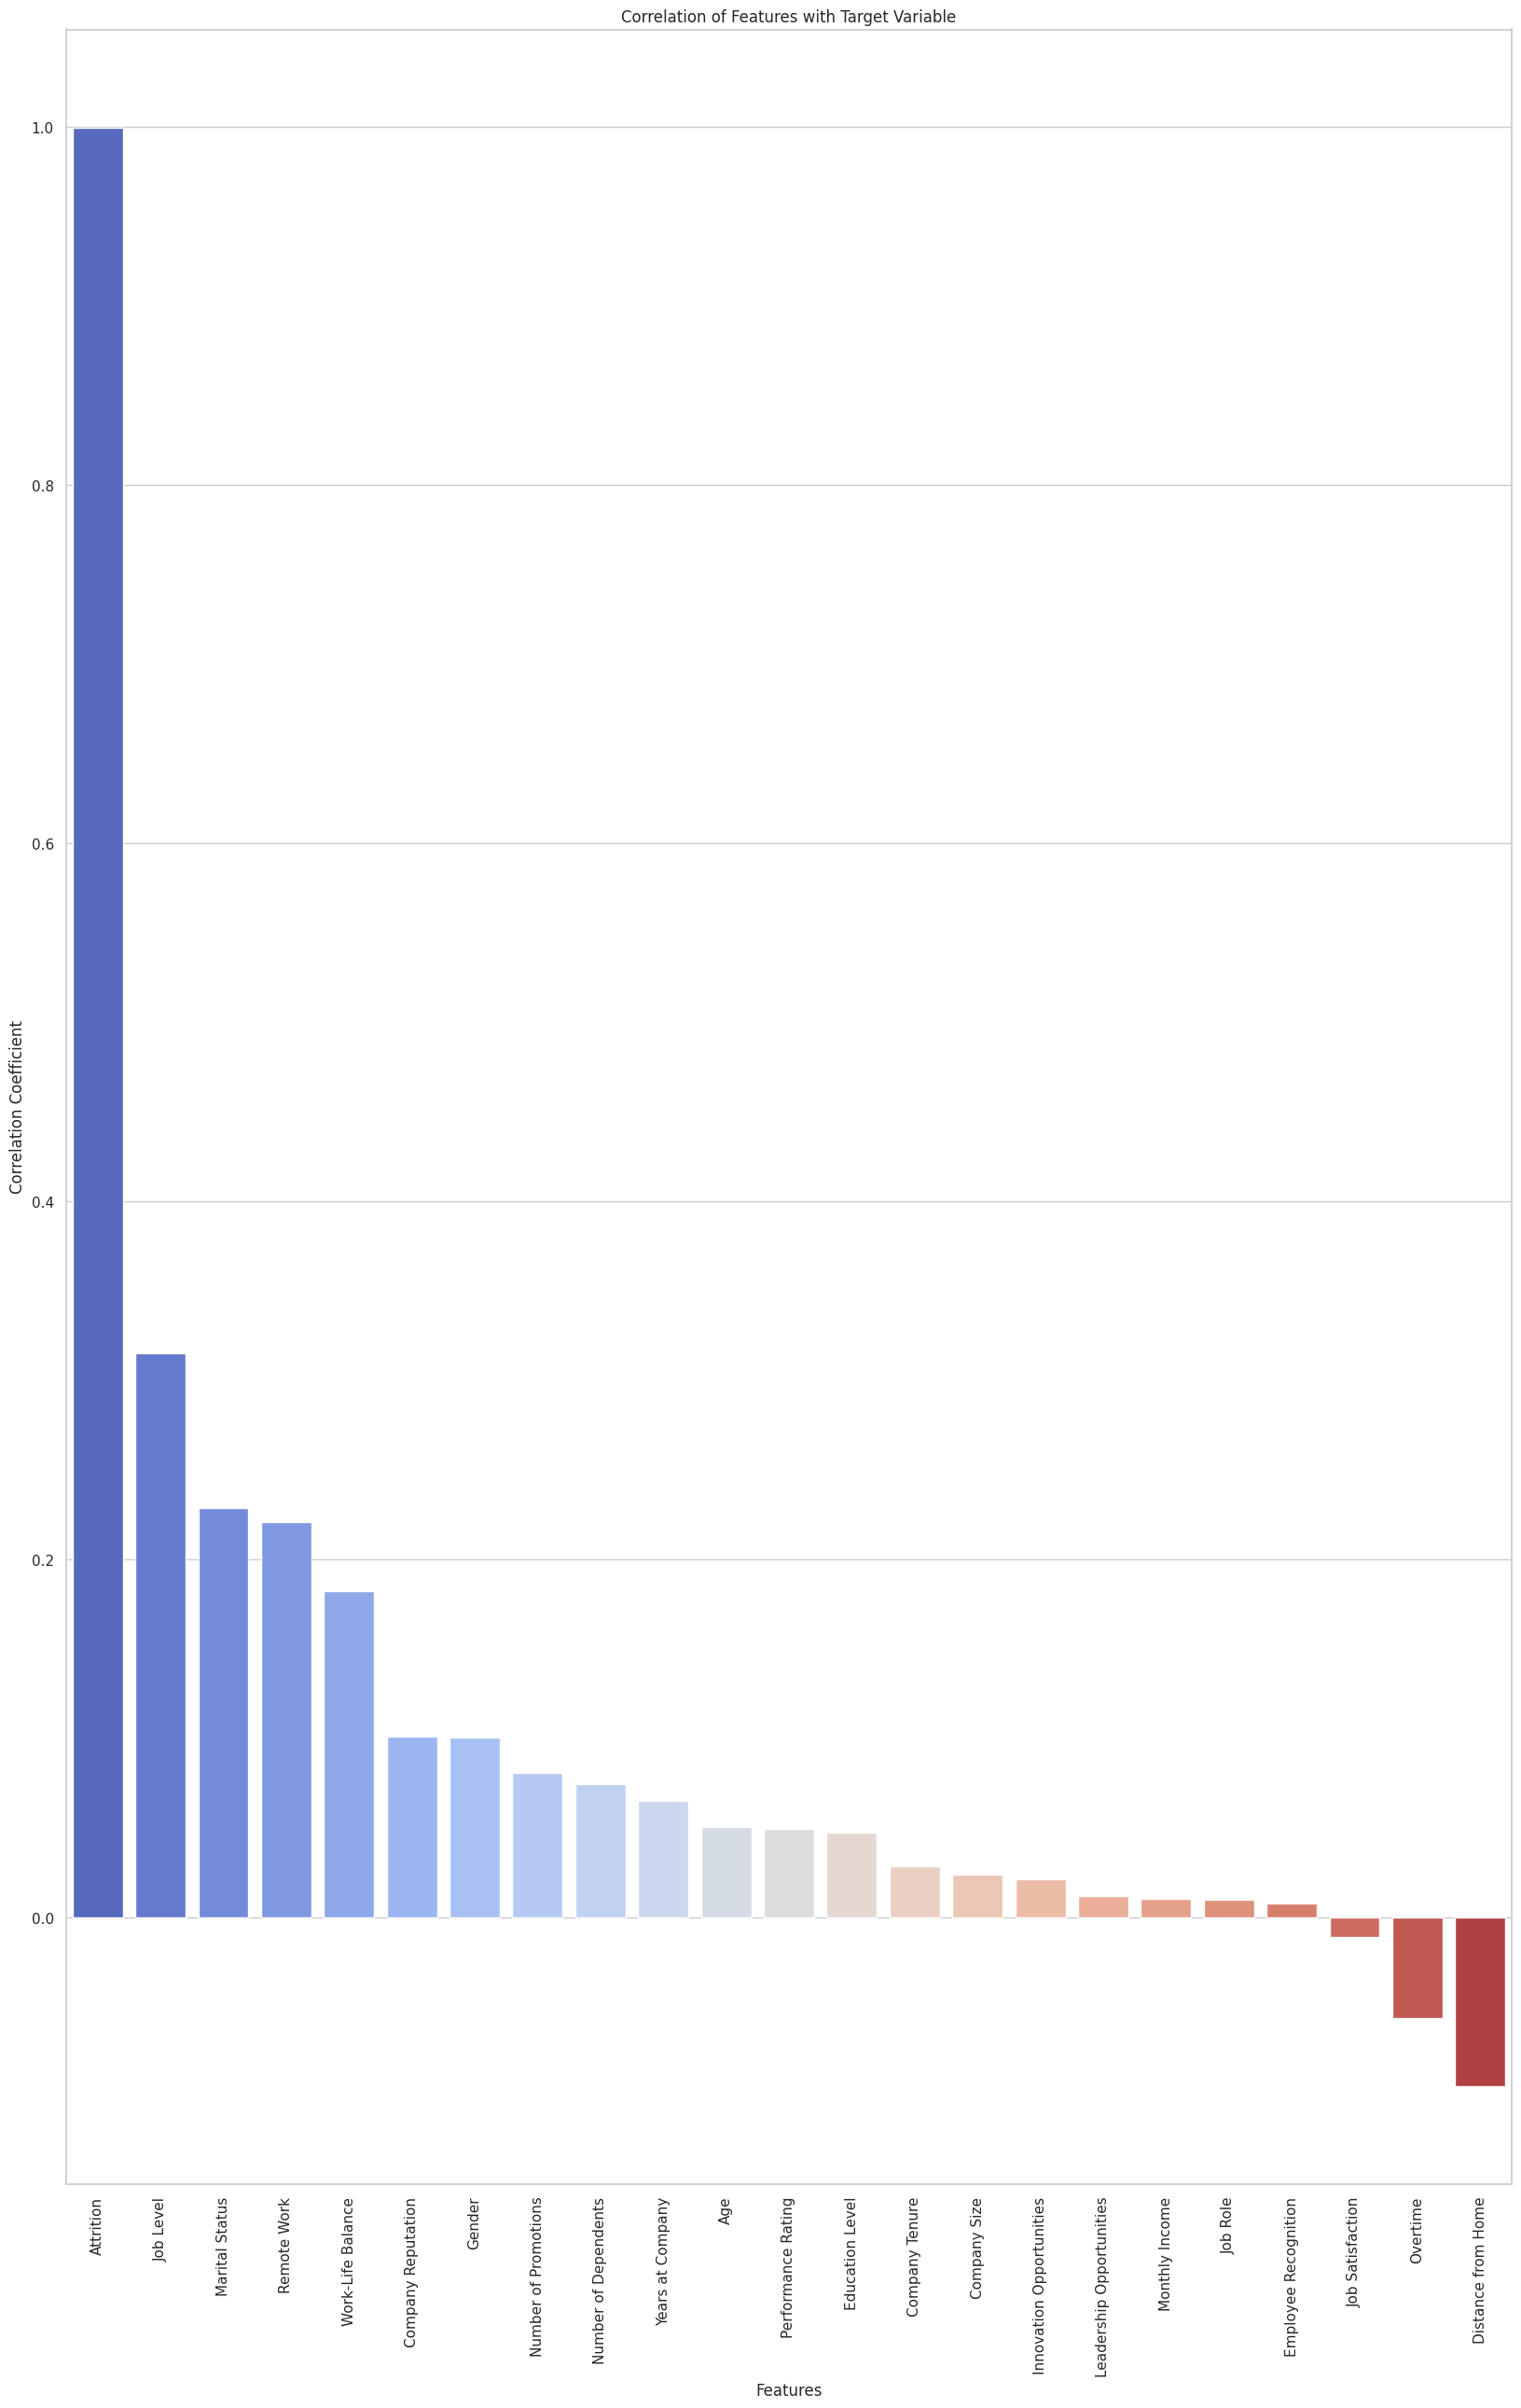

In [34]:
nu= data.select_dtypes(include=['int64', 'float64'])
correlation_matrix=nu.corr()
correlation_with_target = correlation_matrix['Attrition'].sort_values(ascending=False)

# Plotting the correlation with target
plt.figure(figsize=(20, 30))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='coolwarm')
plt.title('Correlation of Features with Target Variable')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

In [35]:
y = data['Attrition']
x = data.drop(columns=['Attrition','Job Role','Monthly Income','Employee Recognition','Leadership Opportunities'])

In [36]:
x

,Age,Gender,Years at Company,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Innovation Opportunities,Company Reputation
0,31,1,19,2,1,2,2.0,0,22,1,1,0.0,1,1,89,0,0,3
1,59,0,4,0,2,0,3.0,0,21,3,2,3.0,1,1,21,0,0,1
2,24,0,10,2,2,0,0.0,0,11,2,1,3.0,1,1,74,0,0,0
3,36,0,7,2,2,3,1.0,0,27,0,0,2.0,1,0,50,1,0,2
4,56,1,41,1,3,2,0.0,1,71,0,2,0.0,2,1,68,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74493,56,0,42,0,1,2,0.0,1,40,1,0,0.0,2,1,60,0,0,0
74494,30,0,15,2,1,2,2.0,1,45,3,1,0.0,0,1,20,0,0,2
74495,52,1,5,2,3,1,0.0,0,4,1,1,4.0,1,0,7,0,0,2
74496,18,1,4,1,2,2,0.0,0,13,2,2,3.0,1,2,5,0,0,0


In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [38]:
x_train

,Age,Gender,Years at Company,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Innovation Opportunities,Company Reputation
8409,23,1,9,2,1,3,0.0,0,64,0,0,0.0,0,1,74,0,0,3
64755,58,0,21,1,1,1,1.0,1,85,1,0,0.0,0,1,36,0,0,2
30256,34,1,17,2,3,2,3.0,0,70,3,1,4.0,0,0,75,0,0,2
65790,57,0,29,1,3,1,1.0,1,85,3,0,1.0,0,2,51,1,1,3
65025,30,0,10,2,1,2,2.0,0,24,1,0,0.0,2,2,23,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,32,1,13,1,1,2,2.0,0,21,1,0,4.0,1,1,26,0,0,2
6265,45,0,16,2,2,2,0.0,0,3,0,0,1.0,0,0,79,1,0,0
54886,28,1,3,2,2,0,0.0,0,22,0,1,1.0,1,1,5,0,0,2
860,39,1,2,2,1,2,2.0,0,52,1,0,2.0,1,1,74,0,0,2


In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [41]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)
f1_score(y_test,y_pred)
confusion_matrix(y_test,y_pred)
print("accuracy:",accuracy_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))
print("confusion_metrics:",confusion_matrix(y_test,y_pred))

accuracy: 0.7514093959731544
f1_score: 0.7622287841828219
confusion_metrics: [[5259 1837]
 [1867 5937]]


In [42]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:
y_pred=dt.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.6761744966442953


In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score

# Define the parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100 ],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize the RandomForestClassifier model
model = RandomForestClassifier(random_state=42)

# GridSearchCV for best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, n_jobs=-1, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Tuned Model Accuracy: {accuracy:.2f}')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-44-c9287b4d086d>", line 19, in <cell line: 19>
    grid_search.fit(x_train, y_train)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 898, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 1422, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 845, in evaluate_candidates
    out = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 65, in __call__
    return su

TypeError: object of type 'NoneType' has no len()

In [46]:
import pandas as pd

# Example new data as a DataFrame
new_data = pd.DataFrame({
    'Age': [30],  # Example values
    'Gender': [1],
    'Years at Company	': [9],
    'Work-Life Balance': [2],
    'Job Satisfaction': [1],
    'Performance Rating': [2],
    'Number of Promotions	': [1],
    'Job Level': [1],
    'Overtime': [0],
    'Distance from Home': [22],
    'Education Level': [1],
    'Marital Status': [1],
    'Number of Dependents`': [0],
    'Company Size	': [1],
    'Company Tenure': [74],
    'Remote Work': [0],
    'Innovation Opportunities': [0],
    'Company Reputation': [1]
})

# Get the correct feature names from the scaler
original_features = scaler.get_feature_names_out()

new_data_reconstructed = pd.DataFrame(0, columns=original_features, index=new_data.index)


for feature in new_data.columns:
    if feature in original_features:
        new_data_reconstructed[feature] = new_data[feature]

new_data_scaled = pd.DataFrame(scaler.transform(new_data_reconstructed), columns=new_data_reconstructed.columns)

In [47]:
# Make predictions using the loaded model
predictions = rf.predict(new_data_scaled)

# Print the predictions
print(predictions)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
